Save the result of the analysis in the text file. The name of the file should include the title of the book and the number of words it contains. The file should contain four columns: (1) rank, (2) word, (3) number of a given word in the text, (4) frequency of a given word in the text. Why do I need both columns (3) and (4)? Think about it.

In [1]:
import re

word_count = {}

# Read the file content
with open('scrambledeggs.txt', 'r') as file:
    file_content = file.read()


def analyze_text():
    global word_count

    # Extract words of length 3 to 10 characters
    filtered_words = re.findall(r'\b[A-Za-z][a-z]{2,9}\b', file_content)
    for token in filtered_words:
        current_count = word_count.get(token, 0)
        word_count[token] = current_count + 1

    # Sort words by their frequency in descending order
    sorted_words = dict(
        sorted(word_count.items(), key=lambda item: item[1], reverse=True))
    total_words = len(filtered_words)
    output_data = ""

    # Generate the result string
    for index, (token, occurrence) in enumerate(sorted_words.items()):
        frequency_percentage = round(occurrence / total_words, 6)
        output_data += f"{index + 1}, {token}, {occurrence}, {frequency_percentage}\n"

    return output_data


# Save the analysis result to a file
with open('output.txt', 'w') as result_file:
    result_file.write(analyze_text())

Compare the empirical distribution from your analysis with the theoretical Zipf distribution by plotting both on the same graph in log-log scale (one graph for each book). Try to do the same in linear scale. What do you observe?

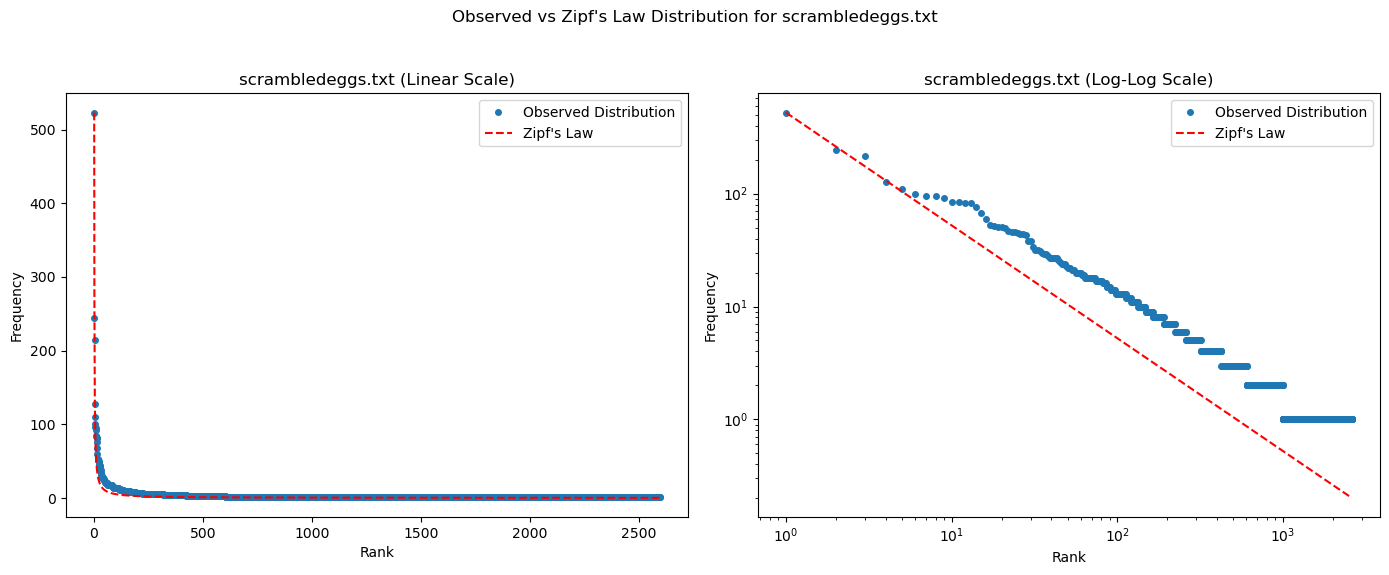

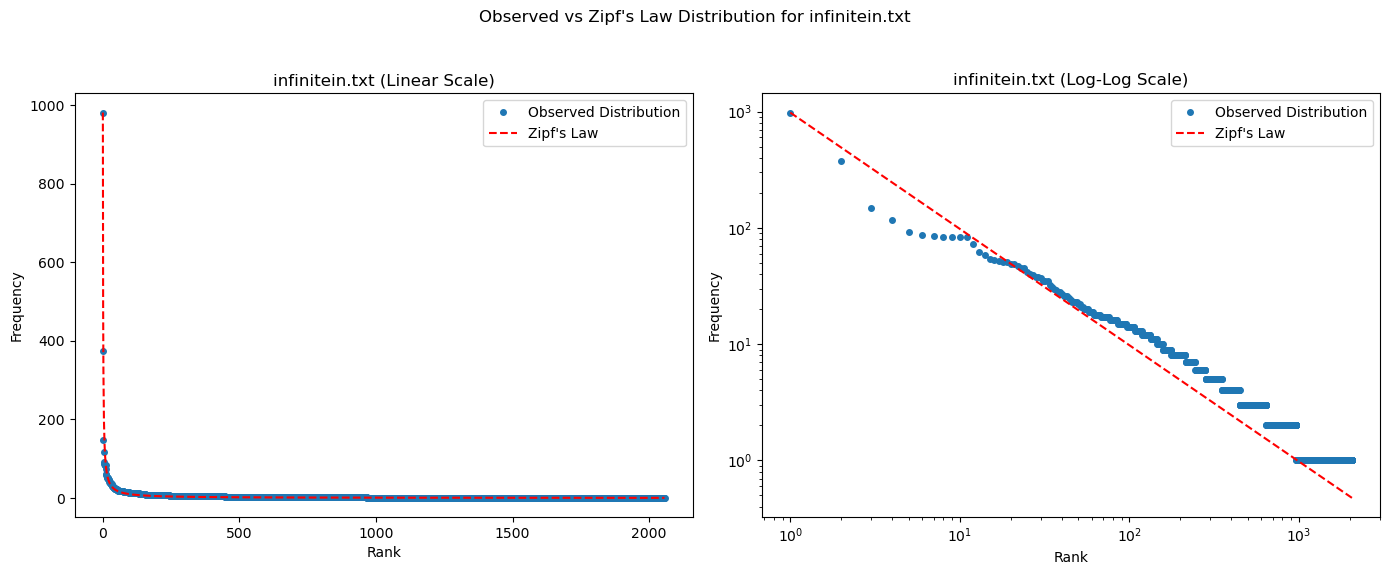

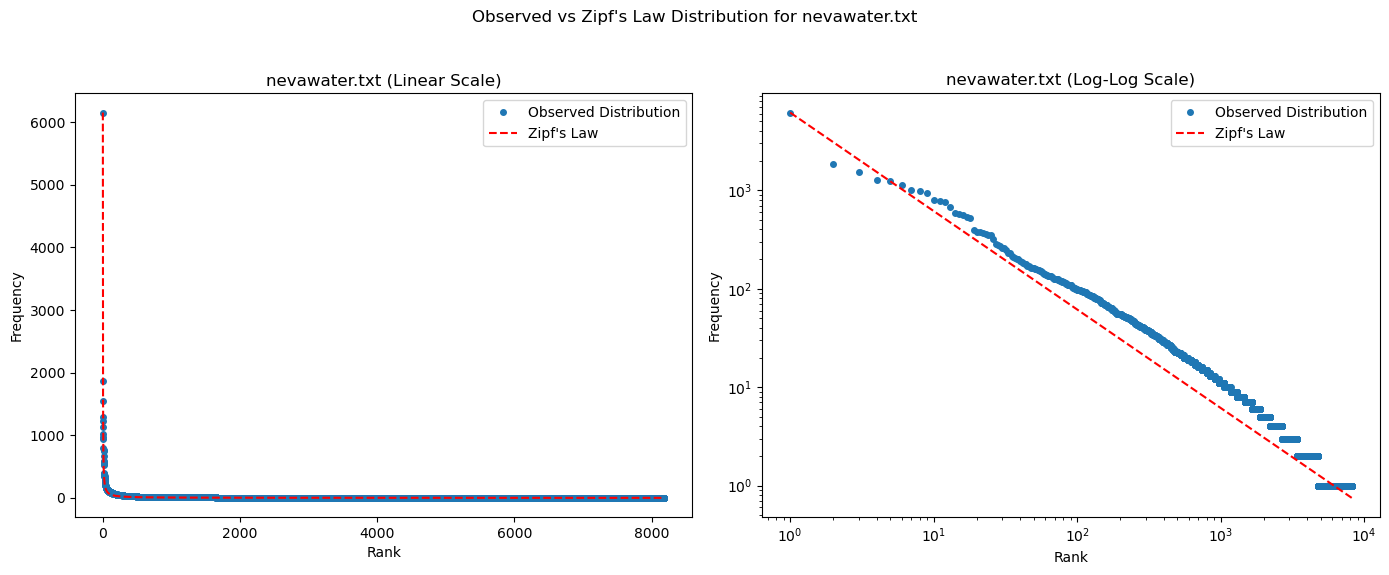

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function to process text and compute word distributions


def extract_distributions(file_content):
    word_frequency = {}
    token_list = re.findall(r'\b[A-Za-z][a-z]{2,9}\b', file_content)

    # Count occurrences of each word
    for token in token_list:
        token_count = word_frequency.get(token, 0)
        word_frequency[token] = token_count + 1

    # Sort word frequencies in descending order
    sorted_frequencies = sorted(word_frequency.values(), reverse=True)
    word_ranks = np.arange(1, len(sorted_frequencies) + 1)
    observed_frequencies = np.array(sorted_frequencies)
    # Zipf's Law: freq ~ 1/rank
    predicted_zipf = observed_frequencies[0] / word_ranks

    return word_ranks, observed_frequencies, predicted_zipf

# Task 3: Define generalized Zipf-Mandelbrot law function


def zipf_mandelbrot(rank, alpha, beta):
    return 1 / (rank + beta) ** alpha


# List of books to analyze
book_files = ['scrambledeggs.txt', 'infinitein.txt', 'nevawater.txt']

# Analyze each book in the list
for book_file in book_files:
    with open(book_file, 'r') as file:
        content = file.read()

    # Get rank, empirical frequencies, and theoretical Zipf frequencies
    ranks, observed_freqs, theoretical_zipf = extract_distributions(content)

    # Create plots
    fig, (linear_plot, loglog_plot) = plt.subplots(1, 2, figsize=(14, 6))

    # Linear scale plot
    linear_plot.plot(ranks, observed_freqs, label="Observed Distribution",
                     marker='o', linestyle='', markersize=4)
    linear_plot.plot(ranks, theoretical_zipf,
                     label="Zipf's Law", color='red', linestyle='--')
    linear_plot.set_xlabel("Rank")
    linear_plot.set_ylabel("Frequency")
    linear_plot.set_title(f"{book_file} (Linear Scale)")
    linear_plot.legend()

    # Log-log scale plot
    loglog_plot.loglog(ranks, observed_freqs, label="Observed Distribution",
                       marker='o', linestyle='', markersize=4)
    loglog_plot.loglog(ranks, theoretical_zipf,
                       label="Zipf's Law", color='red', linestyle='--')
    loglog_plot.set_xlabel("Rank")
    loglog_plot.set_ylabel("Frequency")
    loglog_plot.set_title(f"{book_file} (Log-Log Scale)")
    loglog_plot.legend()

    # Display the plots
    plt.suptitle(f"Observed vs Zipf's Law Distribution for {book_file}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



Log-log scale is better for comparing empirical distribution with Zipf's Law. For 3rd book the plot is the most similiar with theoretical values - the closest to linear character.

Try to fit a and b constants in Zipf-Mandelbrot law freq. ∝ 1/(rank+b)a for two different languages. Is it possible to distinguish languages using a and b parameters only?

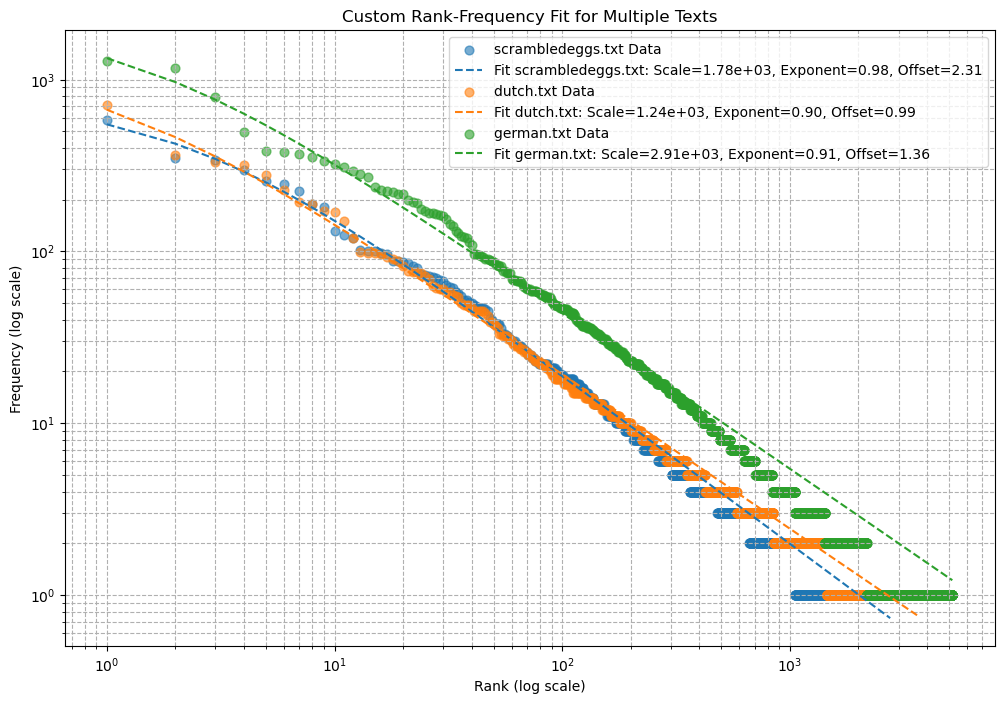

File: scrambledeggs.txt - Scale: 1.78e+03, Exponent: 0.98, Offset: 2.31
File: dutch.txt - Scale: 1.24e+03, Exponent: 0.90, Offset: 0.99
File: german.txt - Scale: 2.91e+03, Exponent: 0.91, Offset: 1.36
Comparison between scrambledeggs.txt and dutch.txt:
 Scale: 1.78e+03 vs 1.24e+03
 Exponent: 0.98 vs 0.90
 Offset: 2.31 vs 0.99
Comparison between scrambledeggs.txt and german.txt:
 Scale: 1.78e+03 vs 2.91e+03
 Exponent: 0.98 vs 0.91
 Offset: 2.31 vs 1.36
Comparison between dutch.txt and german.txt:
 Scale: 1.24e+03 vs 2.91e+03
 Exponent: 0.90 vs 0.91
 Offset: 0.99 vs 1.36


In [5]:
import re
from collections import Counter
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

def rank_frequency_model(rank, scale_factor, exponent, offset):
    return scale_factor / (rank + offset) ** exponent

def calculate_word_occurrences(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read().lower()
        words = re.findall(r'\b\w+\b', content)
        word_frequencies = Counter(words)
    return word_frequencies

def derive_rank_frequency(word_frequencies):
    sorted_frequencies = word_frequencies.most_common()
    rank_positions = np.array([i + 1 for i in range(len(sorted_frequencies))])
    counts = np.array([freq for (_, freq) in sorted_frequencies])
    return rank_positions, counts

text_files = ['scrambledeggs.txt', 'dutch.txt', 'german.txt']
fit_results = {}

for text_file in text_files:
    word_frequencies = calculate_word_occurrences(text_file)
    ranks, counts = derive_rank_frequency(word_frequencies)
    initial_params = [max(counts), 1.0, 1.0]
    fit_results[text_file], _ = curve_fit(rank_frequency_model, ranks, counts, p0=initial_params)

plt.figure(figsize=(12, 8))
for text_file in text_files:
    word_frequencies = calculate_word_occurrences(text_file)
    ranks, counts = derive_rank_frequency(word_frequencies)
    scale_factor, exponent, offset = fit_results[text_file]
    plt.scatter(ranks, counts, label=f'{text_file} Data', alpha=0.6, s=40)
    plt.plot(ranks, rank_frequency_model(ranks, *fit_results[text_file]),
             label=f'Fit {text_file}: Scale={scale_factor:.2e}, Exponent={exponent:.2f}, Offset={offset:.2f}',
             linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Custom Rank-Frequency Fit for Multiple Texts')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()

for text_file in text_files:
    scale_factor, exponent, offset = fit_results[text_file]
    print(f'File: {text_file} - Scale: {scale_factor:.2e}, Exponent: {exponent:.2f}, Offset: {offset:.2f}')

for i, file1 in enumerate(text_files):
    for j, file2 in enumerate(text_files):
        if i < j:
            scale1, exp1, off1 = fit_results[file1]
            scale2, exp2, off2 = fit_results[file2]
            print(f'Comparison between {file1} and {file2}:')
            print(f' Scale: {scale1:.2e} vs {scale2:.2e}')
            print(f' Exponent: {exp1:.2f} vs {exp2:.2f}')
            print(f' Offset: {off1:.2f} vs {off2:.2f}')


I checked 3 books in: dutch, english and german. We can clearly distinguish them by the value of 'a' which indicates different distribution depending on the language used.